<a href="https://colab.research.google.com/github/kylermintah/ExploratoryDataAnalysis/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis - How Africa is Responding to the Pandemic

The purpose of this Colab is to investigate the non-sympotmatic impact of COVID-19 within the context of Sub-Saharan Africa. Much research has been done on the symptoms associated with the disease, but there is still information wanting regarding which non-symptom related factors have the strongest influence on economics, transmission and patient outcomes within the African context.

![alt text](https://www.aljazeera.com/mritems/imagecache/mbdxxlarge/mritems/Images/2020/4/13/9209cd91c589418caabc698e0d5eabf5_18.jpg)


###Setup

In [0]:
%%capture
!pip install pandasql
!pip install chart-studio
!pip install sqlalchemy
!pip install sqlite3

In [0]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib
import time # Time conversions
from wordcloud import WordCloud
from pandasql import sqldf
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import cufflinks as cf

In [4]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#African Dataset - src: https://data.humdata.org/m/dataset/covid-19-impacts-africa?force_layout=light
#Importing a dataset version from my github
git_url_africa_1 = "https://raw.githubusercontent.com/kylermintah/ExploratoryDataAnalysis/master/Africa/geopoll-coronavirus-round2-data_weighted_2020-04-30_final.csv"
africa_df = pd.read_csv(git_url_africa_1)

In [6]:
africa_df.head()

,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Survey Date,Country,Gender,Age Group,Admin1,SEC,Age,BirthYear,Awareness,Urban/Rural,BiggestChallenge,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Other,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodLocations,FoodLocations2,FoodShopping,FoodAmount,Foodworry,BrandPurchase,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Other,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InitiativeTaken: None,InitiativeTaken: Sectioned intercepts,InitiativeTaken: Staff in protective gear,Groups: Brands,Groups: Governments,Groups: NGOs,Groups: Private Sector,Groups: Retailers,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Other,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,SocialMedia,MediaConsumption,StayPositive
0,0.9,1.1,1.0,1.04,04/02/2020,Kenya,Male,15-25,Machakos,B,20,1999,Yes,Rural area,Corona,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,No,Go to hospital,5,All are open,Yes,Online,Less often than usual,Smaller packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,NaN,Consuming more,Nothing
1,0.9,0.9,1.0,0.85,04/02/2020,Kenya,Male,26-35,Uasin Gishu,C1,28,1991,Yes,Urban area,High prices of goods,5,Local infections,No,No,Yes,True,False,True,False,False,More than 5 times,No,Stay home,3,Most are open,No,NaN,Same as usual [no change],Bigger packsize than usual,No,NaN,Decreased,2,True,False,False,False,True,False,False,False,True,True,True,True,True,True,False,True,False,False,False,True,True,Media outlets,Consuming more,Hope
2,1.0,1.0,0.8,0.80,04/02/2020,Nigeria,Male,15-25,Benue,A,20,1999,Yes,Urban area,Light,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,Yes,Go to hospital,4,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,No,NaN,Decreased,4,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,Health organizations,Consuming more,Will go back to school soon
3,0.9,0.9,1.0,0.82,04/02/2020,Kenya,Male,26-35,Kisii,C1,32,1987,Yes,Rural area,The outbreak of covid-19,5,Contracting the disease,Yes,No,Yes,False,False,True,False,False,More than 5 times,No,Go to hospital,5,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,4,False,False,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,False,True,True,True,Health organizations,Consuming more,the covid 19 outbreak has not been confirmed i...
4,0.9,1.1,1.0,0.98,04/02/2020,Kenya,Male,15-25,Nandi,B,25,1994,Yes,Rural area,no job and income due to corona pandemic,5,Economic impact,No,No,Yes,False,False,True,False,False,3-5 times,Yes,Go to hospital,5,Most are closed,Yes,Wholesalers,Less often than usual,Same as usual,Yes,Switch to an alterative brand because it is ch...,Decreased,5,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,Media outlets,Consuming less,talking to peaple and watching movies playing...


## Quick General Analysis
I will drop any columns for the purposes of this analysis that do not lend themselves to quantitative analyses involving means, counts etc.

In [7]:
africa_df.describe()

,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Age,BirthYear,LevelConcern,EconomicImpact,GovernmentTrust
count,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000
mean,1.002533,0.997091,0.999398,0.988112,31.289870,1987.710130,4.312939,4.285607,3.454614
std,0.148856,0.240436,0.383749,0.455145,10.086097,10.086097,1.330646,1.312066,1.613896
min,0.800000,0.600000,0.200000,0.140000,15.000000,1928.000000,1.000000,1.000000,1.000000
25%,0.900000,0.900000,1.000000,0.790000,24.000000,1982.000000,4.000000,4.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,1990.000000,5.000000,5.000000,4.000000
75%,1.000000,1.000000,1.000000,1.010000,37.000000,1995.000000,5.000000,5.000000,5.000000
max,1.500000,1.900000,3.800000,6.470000,91.000000,2004.000000,5.000000,5.000000,5.000000


###Quick Analysis Summary

*   Average Age = **31.289870**
*   Min Age = **15 yrs**, Max Age = **91 yrs** Std Age = **10 yrs**
*   Average Level of Concern = **4.312939** out of 5
*   Average Perceived Economic Impact = **4.285607** out of 5
*   Average Government Trust = **3.454614** out of 5



#Response & Reaction To COVID-19

In this section I analyze the response and concerns the various populations are having with regarding coronavirus

## Is Everyone Taking Preventative Measures?

No. Reflected in the survey data is a percentage of people, albiet small, who are not taking preventative measures against the pandemic. **It will be interesting to investigate the rationale of that particular group.**

In [0]:
opinions_df = lambda q: sqldf(q, globals())
query = """
SELECT
    count(*) as TAKING_PREVENTATIVE_STEPS
FROM
    africa_df p
WHERE
    p.VirusPrevention LIKE '%yes%'
ORDER BY
    TAKING_PREVENTATIVE_STEPS DESC
LIMIT 10;
"""
df_temp = opinions_df(query)
df_temp.head()
taking_measures = df_temp.iloc[0][0]

In [0]:
opinions_df = lambda q: sqldf(q, globals())
query = """
SELECT
    count(*) as NOT_TAKING_PREVENTATIVE_STEPS
FROM
    africa_df p
WHERE
    p.VirusPrevention LIKE '%no%'
ORDER BY
    NOT_TAKING_PREVENTATIVE_STEPS DESC
LIMIT 10;
"""
df_temp = opinions_df(query)
not_taking_measures = df_temp.iloc[0][0]


In [10]:
print(not_taking_measures)
print(taking_measures)
total_participant_count = not_taking_measures + taking_measures

156
3832


Out of the ~4000 survey participants,


In [11]:
print(3832/total_participant_count)

0.9608826479438315


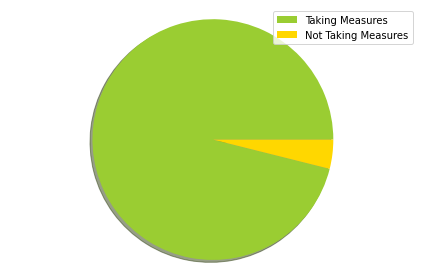

In [12]:
labels = ['Taking Measures', 'Not Taking Measures']
sizes = [taking_measures, not_taking_measures]
colors = ['yellowgreen', 'gold']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Now let's do it again but by country

In [13]:
# countries_surveyed = africa_df['Country'].unique()
countries_surveyed_df = lambda q: sqldf(q, globals())
query = """
SELECT
    country as country, count(*) as count
FROM
    africa_df p
WHERE
    p.VirusPrevention LIKE '%no%'
GROUP BY
    Country
ORDER BY
    count DESC
"""
df_temp = countries_surveyed_df(query)
# not_taking_measures = df_temp.iloc[0][0]
labels = df_temp['country'].tolist()
sizes = df_temp['count'].tolist()
#Just shortening the names of two countries
labels[0] = 'Côte d\'Ivoire'
labels[2] = 'DRC'
print(df_temp)
color_list = ['aquamarine','slateblue','gold','salmon','mediumaquamarine','orchid','dodgerblue','olive','slategrey']

                            country  count
0       Ivory Coast (Cote D'Ivoire)     27
1                        Mozambique     23
2  Democratic Republic of the Congo     21
3                             Benin     18
4                            Zambia     17
5                             Kenya     14
6                             Ghana     13
7                           Nigeria      9
8                            Rwanda      9
9                      South Africa      5


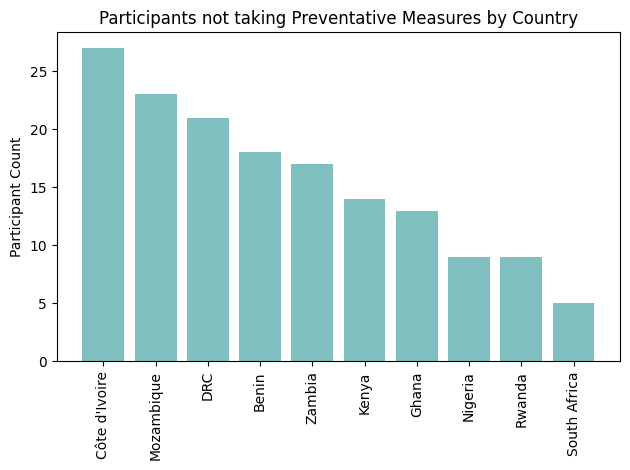

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = labels
y_pos = np.arange(len(objects))
performance = sizes

plt.bar(y_pos, performance, align='center', alpha=0.5, color="teal")
plt.xticks(y_pos, objects, rotation = "vertical")
plt.ylabel('Participant Count')
plt.title('Participants not taking Preventative Measures by Country')
plt.tight_layout()
plt.show()

## For those not taking preventative measures, what were their biggest reasons and concerns?

Here we separate them out from the rest of the group into a new dataframe ' not_taking_measures_df '

In [15]:
not_taking_measures = africa_df['VirusPrevention'] == 'No'
not_taking_measures_df = africa_df[not_taking_measures]
not_taking_measures_df.dropna()
not_taking_measures_df.head()

,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Survey Date,Country,Gender,Age Group,Admin1,SEC,Age,BirthYear,Awareness,Urban/Rural,BiggestChallenge,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Other,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodLocations,FoodLocations2,FoodShopping,FoodAmount,Foodworry,BrandPurchase,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Other,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InitiativeTaken: None,InitiativeTaken: Sectioned intercepts,InitiativeTaken: Staff in protective gear,Groups: Brands,Groups: Governments,Groups: NGOs,Groups: Private Sector,Groups: Retailers,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Other,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,SocialMedia,MediaConsumption,StayPositive
42,1.1,1.0,1.0,1.04,04/02/2020,Kenya,Female,36+,Kwale,E,43,1976,Yes,Rural area,Food,3,Economic impact,No,No,No,False,False,False,False,False,0 times,No,Not sure,3,Most are open,No,NaN,Same as usual [no change],Same as usual,No,NaN,Increased,3,False,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,NaN,No change,Sex
132,1.0,1.0,1.0,1.00,04/02/2020,Ghana,Male,15-25,Central,B,21,1998,Yes,Urban area,The isolation,5,Global infections,No,No,No,False,False,False,False,False,0 times,No,Go to hospital,4,All are open,Yes,Supermarkets,Same as usual [no change],Bigger packsize than usual,Yes,Switch to an alterative brand because it is ch...,Increased,2,True,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True,True,False,True,True,True,Health organizations,Consuming more,Nothing
140,1.0,1.0,0.6,0.67,04/02/2020,Nigeria,Female,15-25,Borno,C2,23,1996,Yes,Rural area,Insecurity,5,Contracting the disease,Yes,No,No,False,False,False,False,False,More than 5 times,Yes,Go to hospital,1,Some are open,Yes,Wholesalers,More often than usual,Same as usual,No,NaN,Decreased,1,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,Friends/family,Consuming less,Reading
174,0.8,0.7,0.9,0.46,04/02/2020,Zambia,Male,26-35,Central,C1,30,1989,Yes,Urban area,de food,5,Contracting the disease,Yes,No,No,False,False,False,False,False,More than 5 times,No,Go to hospital,5,All are open,No,NaN,More often than usual,Bigger packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,1,False,False,True,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,True,False,Health organizations,Consuming more,Tv
240,1.1,0.9,0.9,0.81,04/02/2020,Benin,Female,15-25,Collines,C1,19,2000,Yes,Rural area,NaN,3,Local infections,Yes,No,No,False,False,False,False,False,1-2 times,No,Not sure,5,Most are closed,No,NaN,More often than usual,Smaller packsize than usual,Yes,Switch to an alterative brand because it is ch...,Increased,5,False,False,True,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,NaN,Consuming more,NaN


In [16]:
not_taking_measures_df.describe()

,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Age,BirthYear,LevelConcern,EconomicImpact,GovernmentTrust
count,156.000000,156.00000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.997436,0.99359,0.998718,0.963077,31.339744,1987.660256,3.794872,4.000000,3.166667
std,0.166539,0.25468,0.439499,0.423876,10.372107,10.372107,1.629241,1.506973,1.755483
min,0.800000,0.60000,0.200000,0.190000,17.000000,1945.000000,1.000000,1.000000,1.000000
25%,0.900000,0.90000,0.900000,0.777500,23.000000,1980.000000,2.000000,3.000000,1.000000
50%,1.000000,1.00000,1.000000,1.000000,28.500000,1990.500000,5.000000,5.000000,3.000000
75%,1.000000,1.00000,1.000000,1.012500,39.000000,1996.000000,5.000000,5.000000,5.000000
max,1.500000,1.90000,3.800000,3.530000,74.000000,2002.000000,5.000000,5.000000,5.000000


In [0]:
#Important function for flattening lists
def flatten(list):
  flat_list = []
  for sublist in list:
      for item in sublist:
          flat_list.append(item)
  return flat_list

#Function for tokenizing lists
def tokenize_list(sentences):
  all_words = []
  for sent in sentences:
    words = word_tokenize(sent)
    words = [word.lower() for word in words if word.isalpha()]
    all_words.append(words)
  return all_words

#Function to get most frequently occuring words
def get_mostFreq(word_list):
  word_counter = {}
  for word in word_list:
    if word in word_counter:
        word_counter[word] += 1
    else:
        word_counter[word] = 1
        #Normalizing to aggregate mentions of coronavirus
  if 'covid' in word_counter and 'corona' in word_counter and 'coronavirus' in word_counter and 'virus' in word_counter:
      word_counter['coronavirus'] = word_counter['coronavirus'] + word_counter['covid'] + word_counter['corona'] + word_counter['virus']
      word_counter['covid'] = 0
      word_counter['corona'] = 0
      word_counter['virus'] = 0
  elif 'covid' in word_counter and 'corona' in word_counter and 'coronavirus' in word_counter:
      word_counter['coronavirus'] = word_counter['coronavirus'] + word_counter['covid'] + word_counter['corona']
      word_counter['covid'] = 0
      word_counter['corona'] = 0
  
  popular_words = sorted(word_counter, key=word_counter.get,reverse=True)
  return popular_words

In [0]:
#Let's find out what these people care about
not_taking_measures_df['BiggestChallenge'].apply(lambda x : str(x))
biggest_challenge_list = not_taking_measures_df['BiggestChallenge'].values.tolist()
not_taking_measures_df

concern_list = not_taking_measures_df['Concerns'].values.tolist()

tokens = flatten(tokenize_list(concern_list))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


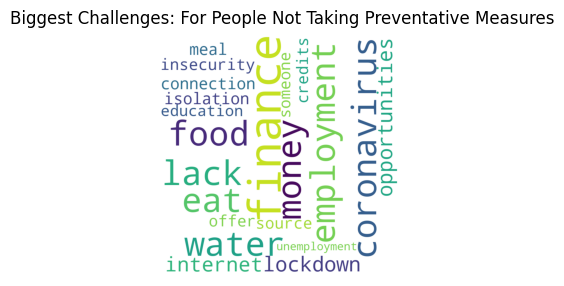

In [33]:
#Let's find out what these people care about
not_taking_measures_df['BiggestChallenge'] = not_taking_measures_df['BiggestChallenge'].apply(lambda x : str(x))
biggest_challenge_list = not_taking_measures_df['BiggestChallenge'].values.tolist()

tokens = flatten(tokenize_list(biggest_challenge_list))
stop_words = set(stopwords.words('english')) 
stop_words.add('de')
stop_words.add('nan')
stop_words.add('getting')
filtered_tokens = [x for x in tokens if x not in stop_words]
highest_counter = get_mostFreq(filtered_tokens)[:22]

comment_words = ' '
for words in highest_counter: 
    comment_words = comment_words + words + ' '

wordCloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordCloud) 
plt.axis("off") 
plt.tight_layout(pad = 20) 
plt.title("Biggest Challenges: For People Not Taking Preventative Measures")
  
plt.show() 

Let's find out how this sentiment compares to the broader group of people who are taking preventative measures

In [20]:
is_taking_measures = africa_df['VirusPrevention'] == 'Yes'
taking_measures_df = africa_df[is_taking_measures]
taking_measures_df.head()

,Gender.Weights,Age Group.Weights,ADM1.Weights,Total Weights,Survey Date,Country,Gender,Age Group,Admin1,SEC,Age,BirthYear,Awareness,Urban/Rural,BiggestChallenge,LevelConcern,Concerns,RiskAwareness,Tested,VirusPrevention,PreventativeMeasures: Avoiding public places,PreventativeMeasures: Avoiding public transport,PreventativeMeasures: Increasing hygiene,PreventativeMeasures: Other,PreventativeMeasures: Working from home,HandWashing,SocialDistancing,HealthBehavior,EconomicImpact,MarketOperability,FoodLocations,FoodLocations2,FoodShopping,FoodAmount,Foodworry,BrandPurchase,NonEssentialItems,GovernmentTrust,CommercialTrust: Banks,CommercialTrust: Brands,CommercialTrust: Other,CommercialTrust: Retailers,CommercialTrust: Telecommuncations,InitiativeTaken: Limited store traffic,InitiativeTaken: None,InitiativeTaken: Sectioned intercepts,InitiativeTaken: Staff in protective gear,Groups: Brands,Groups: Governments,Groups: NGOs,Groups: Private Sector,Groups: Retailers,InformationSources: Friends/family,InformationSources: Government messages,InformationSources: Newspapers,InformationSources: Other,InformationSources: Radio,InformationSources: Social Media,InformationSources: TV,SocialMedia,MediaConsumption,StayPositive
0,0.9,1.1,1.0,1.04,04/02/2020,Kenya,Male,15-25,Machakos,B,20,1999,Yes,Rural area,Corona,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,No,Go to hospital,5,All are open,Yes,Online,Less often than usual,Smaller packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,NaN,Consuming more,Nothing
1,0.9,0.9,1.0,0.85,04/02/2020,Kenya,Male,26-35,Uasin Gishu,C1,28,1991,Yes,Urban area,High prices of goods,5,Local infections,No,No,Yes,True,False,True,False,False,More than 5 times,No,Stay home,3,Most are open,No,NaN,Same as usual [no change],Bigger packsize than usual,No,NaN,Decreased,2,True,False,False,False,True,False,False,False,True,True,True,True,True,True,False,True,False,False,False,True,True,Media outlets,Consuming more,Hope
2,1.0,1.0,0.8,0.80,04/02/2020,Nigeria,Male,15-25,Benue,A,20,1999,Yes,Urban area,Light,5,Contracting the disease,Yes,No,Yes,False,False,False,False,True,More than 5 times,Yes,Go to hospital,4,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,No,NaN,Decreased,4,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,Health organizations,Consuming more,Will go back to school soon
3,0.9,0.9,1.0,0.82,04/02/2020,Kenya,Male,26-35,Kisii,C1,32,1987,Yes,Rural area,The outbreak of covid-19,5,Contracting the disease,Yes,No,Yes,False,False,True,False,False,More than 5 times,No,Go to hospital,5,Most are closed,No,NaN,Less often than usual,Bigger packsize than usual,Yes,Switch to an alterative brand because it is ch...,Decreased,4,False,False,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,False,True,True,True,Health organizations,Consuming more,the covid 19 outbreak has not been confirmed i...
4,0.9,1.1,1.0,0.98,04/02/2020,Kenya,Male,15-25,Nandi,B,25,1994,Yes,Rural area,no job and income due to corona pandemic,5,Economic impact,No,No,Yes,False,False,True,False,False,3-5 times,Yes,Go to hospital,5,Most are closed,Yes,Wholesalers,Less often than usual,Same as usual,Yes,Switch to an alterative brand because it is ch...,Decreased,5,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,Media outlets,Consuming less,talking to peaple and watching movies playing...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


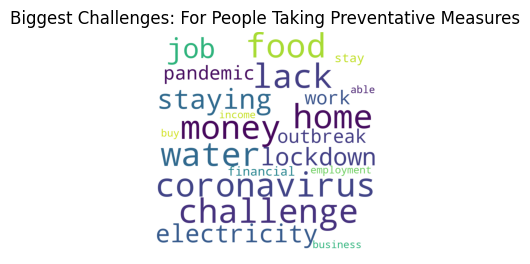

In [34]:
#Let's find out what these people care about
taking_measures_df['BiggestChallenge'] = taking_measures_df['BiggestChallenge'].apply(lambda x : str(x))
biggest_challenge_list = taking_measures_df['BiggestChallenge'].values.tolist()

tokens = flatten(tokenize_list(biggest_challenge_list))
stop_words = set(stopwords.words('english')) 
stop_words.add('de')
stop_words.add('nan')
stop_words.add('getting')
stop_words.add('going')
stop_words.add('go')
stop_words.add('getting')
stop_words.add('due')
stop_words.add('today')
stop_words.add('biggest')


filtered_tokens = [x for x in tokens if x not in stop_words]
highest_counter = get_mostFreq(filtered_tokens)[:22]

comment_words = ' '
for words in highest_counter: 
    comment_words = comment_words + words + ' '

wordCloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordCloud) 
plt.axis("off") 
# plt.tight_layout(pad = 15) 
plt.title("Biggest Challenges: For People Taking Preventative Measures")
plt.tight_layout(pad=20)
plt.show() 

## All the Respondents all listed their biggest challenges and General Concerns

Some of these challenges are the same thing expressed in different ways. I will combine them

In [22]:
challenge_array = africa_df['Concerns'].unique()
challenge_counts = africa_df['Concerns'].value_counts()
print(challenge_counts)
challenge_counts_df = pd.DataFrame(challenge_counts)
challenge_counts_df.rename( columns={list(challenge_counts_df)[0]:'Descr', 'Concerns':'count'}, inplace=True )
challenge_counts_df.head()
challenge_counts_df['concern'] = challenge_counts_df.index
challenge_counts_df.reset_index(drop=True, inplace=True)
challenge_counts_df.head()

Contracting the disease    1083
Economic impact             990
Global infections           968
Local infections            514
Travel restrictions         271
Other                       162
Name: Concerns, dtype: int64


,count,concern
0,1083,Contracting the disease
1,990,Economic impact
2,968,Global infections
3,514,Local infections
4,271,Travel restrictions


In [23]:
print(challenge_counts_df)

   count                  concern
0   1083  Contracting the disease
1    990          Economic impact
2    968        Global infections
3    514         Local infections
4    271      Travel restrictions
5    162                    Other


Text(0.5, 1.0, 'Biggest Concerns regarding the Pandemic')

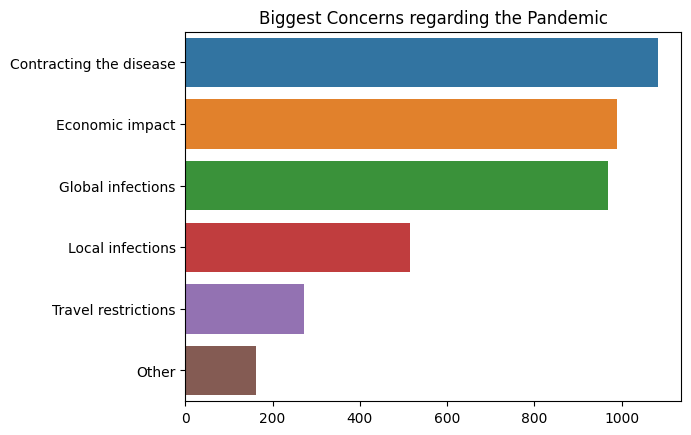

In [26]:
#Ranking of concern
x = challenge_counts_df['count'].values.tolist()
y = challenge_counts_df['concern'].values.tolist()
sns.barplot(x, y).set_title('Biggest Concerns regarding the Pandemic')


In [45]:
rural_df = africa_df["Urban/Rural"]=="Urban area"
rural_df = rural_df.astype(int)
urban_rural_ratio = rural_df.sum()/rural_df.count()
print(urban_rural_ratio)
## 67 percent of respondants reported living in rural areas

0.6700100300902708


# Breaking down how corona has affected the respondants

0.12111334002006018
0.07948846539618856
0.6469408224674023
0.15245737211634897


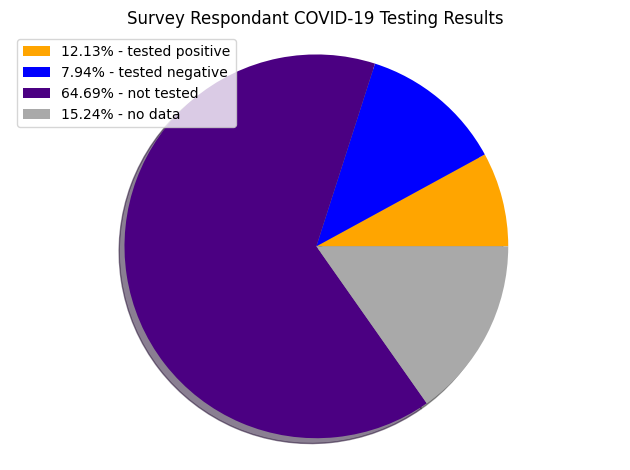

In [71]:
# How Corona has directly influenced this population

pos_corona_df = africa_df["Tested"]=="Yes - tested positive"
pos_corona_df = pos_corona_df.astype(int)
pos_test = pos_corona_df.sum()/pos_corona_df.count()

neg_corona_df = africa_df["Tested"]=="Yes - tested negative"
neg_corona_df = neg_corona_df.astype(int)
neg_test = neg_corona_df.sum()/neg_corona_df.count()

no_test_corona_df = africa_df["Tested"]=="No"
no_test_corona_df = no_test_corona_df.astype(int)
no_test = no_test_corona_df.sum()/no_test_corona_df.count()

no_data = 1 - no_test - pos_test - neg_test

print(neg_test)
print(pos_test)
print(no_test)
print(no_data)

size_list = [pos_test, neg_test, no_test, no_data]
label_list = ["12.13% - tested positive", "7.94% - tested negative", "64.69% - not tested", "15.24% - no data"]

colors = ['orange', 'blue', 'indigo', 'darkgrey']
patches, texts = plt.pie(size_list, colors=colors, shadow=True, startangle=0)
plt.legend(patches, label_list, loc="best")
plt.axis('equal')
plt.title('Survey Respondant COVID-19 Testing Results')
plt.tight_layout()
plt.show()